In [50]:
#importing the necessary libraries and loading the data set
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df = pd.read_csv('complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-05-20,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NY,11729,NaN,NaN,Web,2023-05-20,In progress,Yes,NaN,7004660
1,2023-05-20,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",PR,00725,NaN,NaN,Web,2023-05-20,In progress,Yes,NaN,7004849
2,2023-05-20,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",FL,33183,NaN,NaN,Web,2023-05-20,In progress,Yes,NaN,7004853
3,2023-05-20,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",NJ,07424,NaN,NaN,Web,2023-05-20,In progress,Yes,NaN,7004896
4,2023-05-20,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",NY,10465,NaN,NaN,Web,2023-05-20,In progress,Yes,NaN,7004899


In [51]:
#checking for null values
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        707314
Consumer complaint narrative    2336866
Company public response         2006661
Company                               0
State                             41336
ZIP code                          30181
Tags                            3263336
Consumer consent provided?       876162
Submitted via                         0
Date sent to company                  0
Company response to consumer          4
Timely response?                      0
Consumer disputed?              2891841
Complaint ID                          0
dtype: int64

In [52]:
#dropping the columns with lots of null values
df = df.drop(['Consumer complaint narrative', 'Company public response', 'Consumer disputed?','Tags','Consumer consent provided?'], axis=1)

In [53]:
df.isnull().sum()

Date received                        0
Product                              0
Sub-product                     235291
Issue                                0
Sub-issue                       707314
Company                              0
State                            41336
ZIP code                         30181
Submitted via                        0
Date sent to company                 0
Company response to consumer         4
Timely response?                     0
Complaint ID                         0
dtype: int64

In [54]:
#filling the null values in categorical columns with Not provided and In progress
df['ZIP code'] = df['ZIP code'].fillna('Not provided')
df['State'] = df['State'].fillna('Not provided')


In [55]:
df['Sub-product'] = df['Sub-product'].fillna('Not provided')
df['Sub-issue'] = df['Sub-issue'].fillna('Not provided')
df['Company response to consumer'] = df['Company response to consumer'].fillna('In progress')

In [56]:
df.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Company                         0
State                           0
ZIP code                        0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Complaint ID                    0
dtype: int64

In [57]:
#dropping any duplicate columns
df = df.drop_duplicates()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660199 entries, 0 to 3660198
Data columns (total 13 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Company                       object
 6   State                         object
 7   ZIP code                      object
 8   Submitted via                 object
 9   Date sent to company          object
 10  Company response to consumer  object
 11  Timely response?              object
 12  Complaint ID                  int64 
dtypes: int64(1), object(12)
memory usage: 391.0+ MB


In [59]:
#changing the data type numerical to object
df['Complaint ID'] = df['Complaint ID'].astype(str)

In [60]:
#creating a new data set that is cleaned
df.to_csv('cleaned_complaints_dataset.csv', index=False)

In [61]:
df.describe()

,Date received,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
count,3660199,3660199,3660199,3660199,3660199,3660199,3660199,3660199,3660199,3660199,3660199,3660199,3660199
unique,4188,18,77,165,222,6753,64,32859,7,4137,8,2,3660199
top,2023-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Not provided,"EQUIFAX, INC.",CA,XXXXX,Web,2023-03-14,Closed with explanation,Yes,7004660
freq,4652,1879447,1860176,920031,707314,670174,433976,91407,3145549,4592,2719577,3607509,1


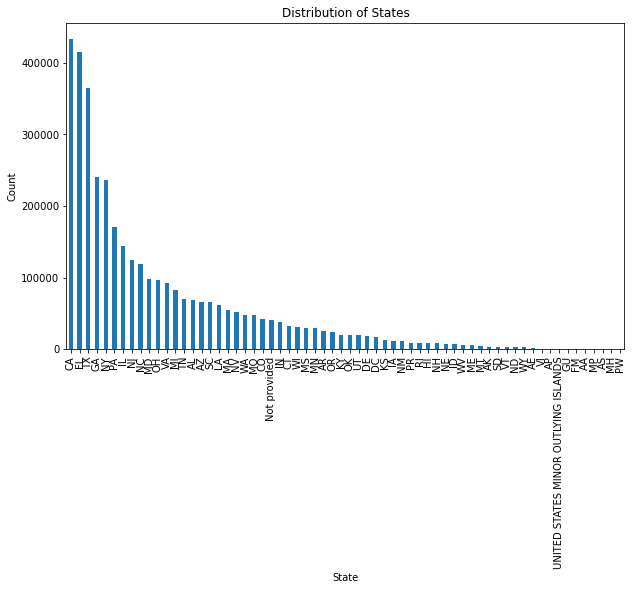

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['State'].value_counts().plot(kind='bar')
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

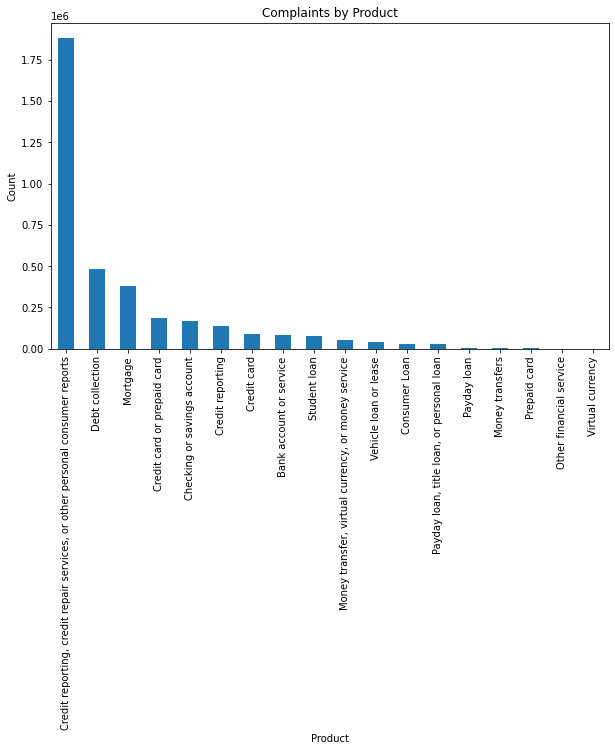

In [68]:
# Visualize product counts
#  Product and Issue Analysis
product_counts = df['Product'].value_counts()
issue_counts = df['Issue'].value_counts()
# Visualize product counts
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Complaints by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

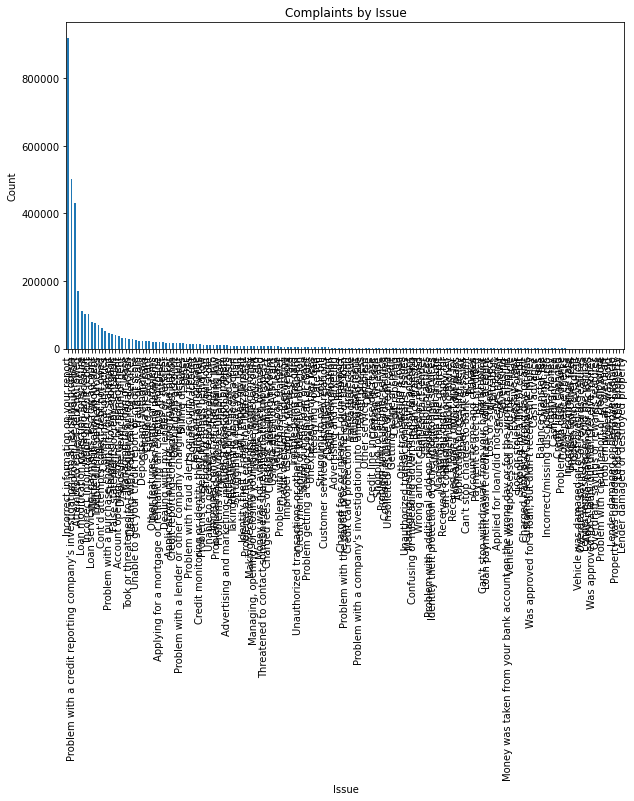

In [69]:
# Visualize issue counts
plt.figure(figsize=(10, 6))
issue_counts.plot(kind='bar')
plt.title('Complaints by Issue')
plt.xlabel('Issue')
plt.ylabel('Count')
plt.show()

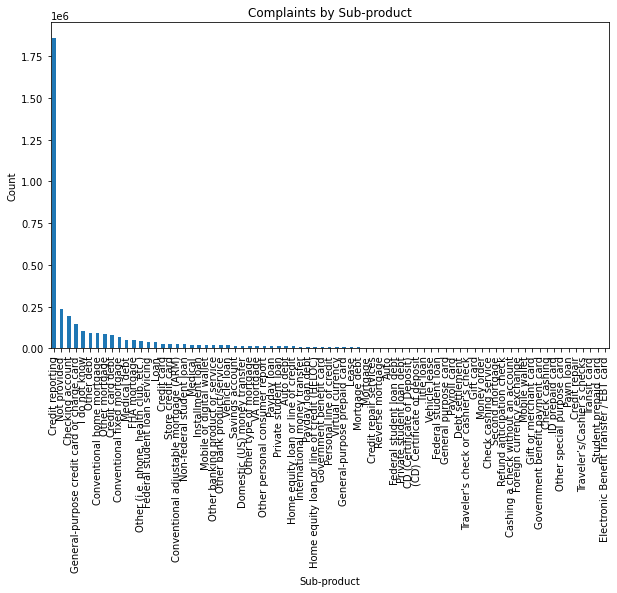

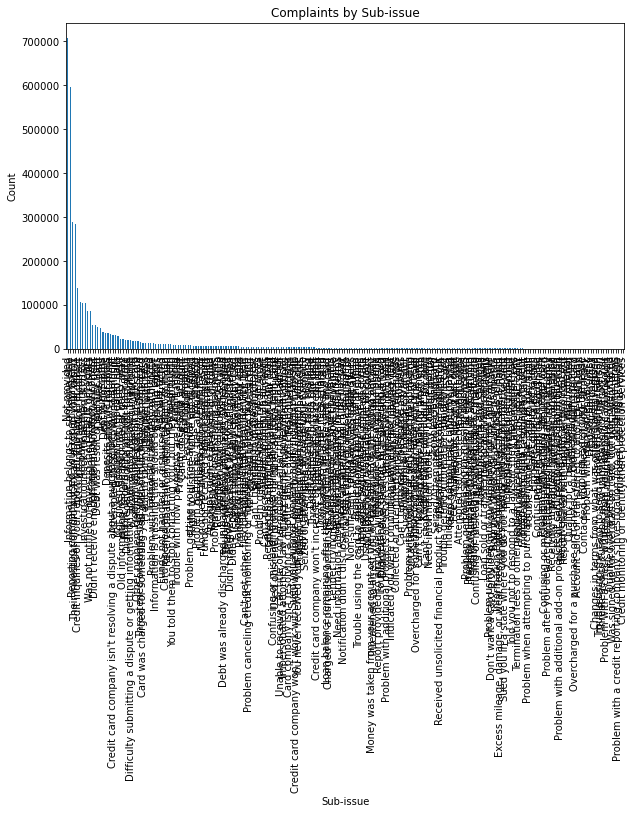

In [70]:
# 2. Sub-product and Sub-issue Analysis
subproduct_counts = df['Sub-product'].value_counts()
subissue_counts = df['Sub-issue'].value_counts()

# Visualize sub-product counts
plt.figure(figsize=(10, 6))
subproduct_counts.plot(kind='bar')
plt.title('Complaints by Sub-product')
plt.xlabel('Sub-product')
plt.ylabel('Count')
plt.show()

# Visualize sub-issue counts
plt.figure(figsize=(10, 6))
subissue_counts.plot(kind='bar')
plt.title('Complaints by Sub-issue')
plt.xlabel('Sub-issue')
plt.ylabel('Count')
plt.show()

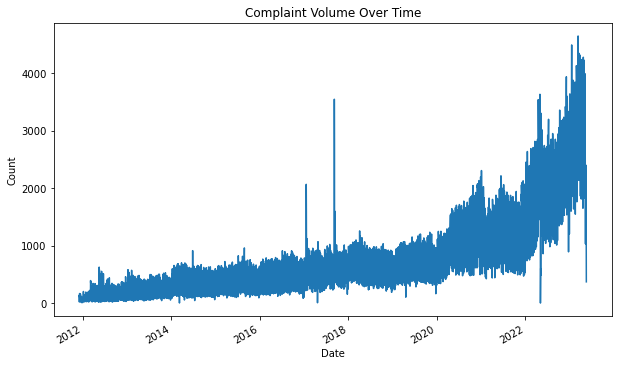

In [73]:
# 3. Complaint Volume Over Time
df['Date received'] = pd.to_datetime(df['Date received'])
complaints_over_time = df['Date received'].value_counts().sort_index()

# Visualize complaint volume over time
plt.figure(figsize=(10, 6))
complaints_over_time.plot(kind='line')
plt.title('Complaint Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

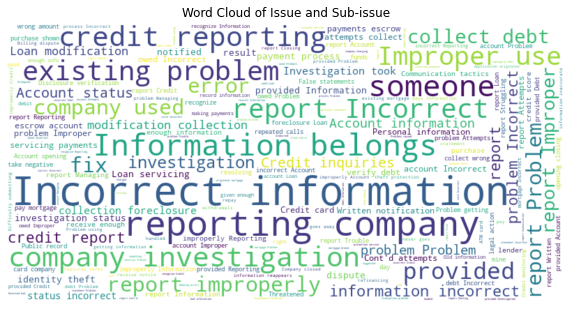

In [74]:


# Concatenate the text from "Issue" and "Sub-issue" columns
text = ' '.join(df['Issue'].dropna()) + ' ' + ' '.join(df['Sub-issue'].dropna())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Issue and Sub-issue')
plt.show()